# Importing Libraries and Data set

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Classroom/Data Analytics Cohort 4/marketing_data.csv'

data = pd.read_csv(path)

df = data.copy()

# Dataset is now stored in a Pandas Dataframe

In [ ]:
#Checking columns

df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

#Data Cleaning and Data Wrangling

In the initial stage, we prepare our data for analysis. We start by checking the data types an then cleaning our data if required. We do the following:

In [ ]:
#Cleaning any whitespaces existing in the columns
df.columns=df.columns.str.replace(" ", "")

Check if any null column exists

In [ ]:
#Checking if any null column exists
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

Since the feature/column Income contain 24 values that are null, we will impute the values by mean, median or mode of all entries in the Income column

But first we will check the data type for all features as well to proceed on to data imputation


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [ ]:
#Checking the data types for all columns
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

Since income should be numeric, we will convert the data type for income, from object to float

First we have to remove the dollar sign \$ and comma (,) from all the income entries because if we directly attempt to convert the data type it shows ValueError: could not convert string to float: '$84,835.00 '


In [ ]:
df['Income']=df['Income'].str.replace(",", "")
df['Income']=df['Income'].str.replace("$", "")
df['Income']

<ipython-input-10-07c39104d70f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income']=df['Income'].str.replace("$", "")


0       84835.00 
1       57091.00 
2       67267.00 
3       32474.00 
4       21474.00 
          ...    
2235    66476.00 
2236    31056.00 
2237    46310.00 
2238    65819.00 
2239    94871.00 
Name: Income, Length: 2240, dtype: object

Now we will convert the data type of 'Income' from object to float


In [ ]:
#Now we will convert the data type from object to float
df['Income']=df['Income'].astype('float')
df['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [ ]:
#Checking the Income data type
df['Income'].dtypes

dtype('float64')

Now we will move on to imputation for 24 null values in Income feature

Text(0, 0.5, 'count')

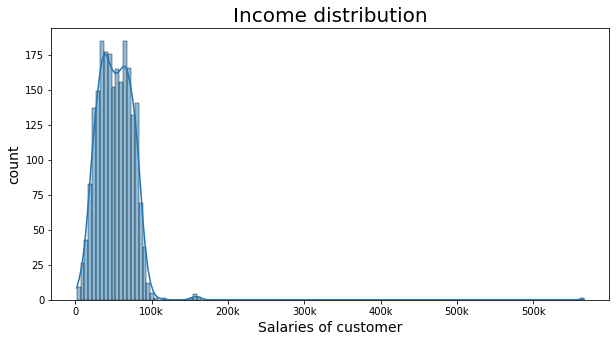

In [ ]:
plt.figure(figsize=(10,5))

sb.histplot(df['Income'], kde = True)

#sb.distplot(df['Income'], kde=False, hist=True)

plt.xticks([0,100000,200000,300000,400000,500000,600000], ["0","100k","200k","300k","400k","500k", "500k"])

#plt.grid(True)
plt.title('Income distribution', size=20)
plt.xlabel("Salaries of customer", size=14)
plt.ylabel('count',size=14)

We can see that there are outliers in the Income feature

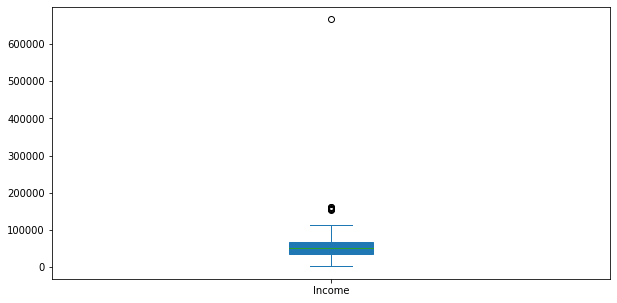

In [ ]:
df['Income'].plot(kind='box', figsize=(10,5), patch_artist=True)

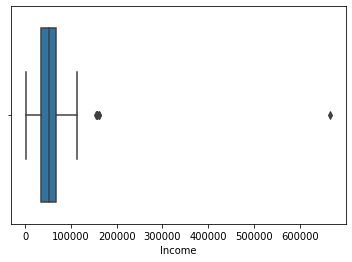

In [ ]:
sb.boxplot(x='Income',data=df);

The boxplot confirms that there are huge outliers.

Therefore, we will impute the missing values of Income feature using median. We are not using mean because the huge outliers will skew the mean.

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [ ]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

We also make Income brackets in order to better our analysis. We break the income into the following brackets:</br>

In [ ]:
#Making Income brackets

def salary_stats(value):
    if value < 25000:
        return "Below $25K"
    if 25000 <= value < 50000:
        return "$25K-$50K"
    elif 50000 <= value < 75000:
        return "$50K-$75K"
    elif 75000 <= value:
        return "Above $75K"

df['Income_level'] = df['Income'].map(salary_stats)

df['Income_level'].unique()

array(['Above $75K', '$50K-$75K', '$25K-$50K', 'Below $25K'], dtype=object)


Similarly, we convert Dt_Customer from object to date time format

In [ ]:
#Similarly, we convert Dt_Customer from object to date time format
df['Dt_Customer'].head()

0    6/16/14
1    6/15/14
2    5/13/14
3    5/11/14
4     4/8/14
Name: Dt_Customer, dtype: object

In [ ]:
df['Dt_Customer'].dtypes

dtype('O')

In [ ]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [ ]:
#Checking Dt_Customer data type

df['Dt_Customer'].dtypes

dtype('<M8[ns]')

Here we calculate and make a separate column for total sales for all products

In [ ]:
df['Total_Sales'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

df['Total_Sales']

0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: Total_Sales, Length: 2240, dtype: int64

We also calculate and make a separate column for Total Purchases

In [ ]:
df['Total_Purchase'] = df['NumDealsPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumWebPurchases']

df['Total_Purchase']

0       15
1       18
2       11
3        4
4        8
        ..
2235    20
2236     5
2237    14
2238    20
2239    18
Name: Total_Purchase, Length: 2240, dtype: int64

We will also calculate the Average Order Value for each customer.

Average Order Value:
The Average Order Value is calculated by dividing the total revenue by the number of orders placed. Often, this metric is  calculated monthly (i.e. total revenue from the month divided by total orders placed that month), but it can also be calculated weekly or even daily.

In [ ]:
df["AOV"]= df['Total_Sales']/df['Total_Purchase']


df.fillna({'AOV' : 0},inplace=True) 
# Handling for cases where division by 0 may yield unwanted results
df.replace(np.inf,0,inplace=True)

df["AOV"]

0       79.333333
1       32.055556
2       22.818182
3        2.750000
4       11.375000
          ...    
2235    34.450000
2236    11.000000
2237    22.071429
2238    69.150000
2239    59.888889
Name: AOV, Length: 2240, dtype: float64

Now we calculate and make a separate column for Customer_Age by substracting the Year_Birth (which we have previously calculated) from the present year i. e. 2022. This way our data will be more meaningful for analysis.

In [ ]:
df["Customer_Age"] = 2022 - df['Year_Birth']

#df.rename(columns = {'Year_Birth':'Customer_Age'}, inplace = True)
#df['Customer_Age'] = df.Customer_Age.apply(lambda x: 2022-x)

df["Customer_Age"]

0       52
1       61
2       64
3       55
4       33
        ..
2235    46
2236    45
2237    46
2238    44
2239    53
Name: Customer_Age, Length: 2240, dtype: int64

Just like we made income bracket, we will segment the ages of customers into 
Age brackets.</br>

Age Brackets</br>
G. I. Generation - born 1901 to 1927 </br>
The Silent Generation - born 1928 to 1945 </br>
Baby Boomers: born 1946 to 1964. ...</br>
Generation X: born 1965 to 1980. ...</br>
Millennials or Gen Y: born 1981 to 1996. ...</br>
Generation Z: born 1997 or after. ...</br>
Generation Alpha: born 2010 or after.

In [ ]:
#Making Age brackets

def age_brackets(value):
    if 1901 <= value < 1928:
        return "G. I. Generation"
    elif 1928<= value < 1946:
        return "The Silent Generation"
    elif 1946<= value<1965:
        return "Baby Boomers"
    elif 1965<= value<1981:
        return "Gen X"
    elif 1981<= value<1997:
        return "Gen Y"
    elif 1997<= value:
        return "Gen Z"

df['Age_Bracket'] =df["Year_Birth"].map(age_brackets)

In [ ]:
df = df.dropna()

In [ ]:
df['Age_Bracket'].unique()

array(['Gen X', 'Baby Boomers', 'Gen Y', 'The Silent Generation'],
      dtype=object)

We also impute the PhD and Master values in Education by 2nd cycle in Education column (2nd cycle Education is any degree obtained beyond Masters degree)

In [ ]:
df["Education"].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [ ]:
df['Education']=df['Education'].str.replace("2n Cycle", "2nd Cycle")

df['Education'].unique()

<ipython-input-31-f206a469884a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education']=df['Education'].str.replace("2n Cycle", "2nd Cycle")


array(['Graduation', 'PhD', '2nd Cycle', 'Master', 'Basic'], dtype=object)

In [ ]:
df['Education']=df['Education'].str.replace("Master", "2nd Cycle")

df['Education'].unique()

<ipython-input-32-dc2259102c61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education']=df['Education'].str.replace("Master", "2nd Cycle")


array(['Graduation', 'PhD', '2nd Cycle', 'Basic'], dtype=object)

In [ ]:
df['Education']=df['Education'].str.replace("PhD", "2nd Cycle")

df['Education'].unique()

<ipython-input-33-cd8647c91f2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education']=df['Education'].str.replace("PhD", "2nd Cycle")


array(['Graduation', '2nd Cycle', 'Basic'], dtype=object)

Now we separate Month from Month/Date/Year sequence in Dt_Customer column

In [ ]:
df['Month_'] = pd.DatetimeIndex(df['Dt_Customer']).month
df['Month_']

<ipython-input-34-2968a293c461>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_'] = pd.DatetimeIndex(df['Dt_Customer']).month


0        6
1        6
2        5
3        5
4        4
        ..
2235     3
2236     1
2237    12
2238    11
2239     9
Name: Month_, Length: 2237, dtype: int64

Now we map alphabetical sequence of months with regards to numerical order and store it in a separate column called Month 

In [ ]:
def month_name(value):
    if value == 1:
        return "Jan"
    elif value == 2 :
        return "Feb"
    elif value == 3 :
        return "Mar"
    elif value == 4:
        return "Apr"
    elif value == 5:
        return "May"
    elif value == 6:
        return "Jun"
    elif value == 7:
        return "July"
    elif value == 8:
        return "Aug"
    elif value == 9:
        return "Sep"
    elif value == 10:
        return "Oct"
    elif value == 11:
        return "Nov"
    elif value == 11:
        return "Dec"
   
df['Month'] = df['Month_'].map(month_name)
df['Month'].unique()

<ipython-input-35-4f1f6e2d4182>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month_'].map(month_name)


array(['Jun', 'May', 'Apr', 'Mar', 'Jan', None, 'Oct', 'Sep', 'Aug',
       'July', 'Feb', 'Nov'], dtype=object)

Month/Date/Year to Year

In [ ]:
df['Year'] = pd.DatetimeIndex(df['Dt_Customer']).year
df['Year'].unique()

<ipython-input-36-4268ff7a37d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.DatetimeIndex(df['Dt_Customer']).year


array([2014, 2013, 2012])

Also we divide the months in fours quarters namely Q1, Q2, Q3 and Q4 in the Quarter column

In [ ]:
def quarter(value):
    if 0 <= value < 4:
        return "Q1"
    elif 4 <= value <7 :
        return "Q2"
    elif 7<= value<10:
        return "Q3"
    elif 10<= value<13:
        return "Q4"

df['Quarter'] = df['Month_'].map(quarter)

df['Quarter'].unique()

<ipython-input-37-1979e365d941>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarter'] = df['Month_'].map(quarter)


array(['Q2', 'Q1', 'Q4', 'Q3'], dtype=object)

We cateogrize Alone, YOLO and Absurd as Single in the Marital_Status column 

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')

<ipython-input-38-06329c11da12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')


We rename the Response column as LastCmp since it is the last campaign carried out.

In [ ]:
df.rename(columns = {'Response':'LastCmp'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


We also make a separate column namely Dependents where we calculate the total number of dependents per customer

In [ ]:
df['Dependents'] = df['Kidhome'] + df['Teenhome']

<ipython-input-40-ebe7de858248>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dependents'] = df['Kidhome'] + df['Teenhome']


# Exploratory Data Analysis

Now, once the data is clean and prepared, we will move on to solving the business problems

## Analysis w. r. t. Marital Status

In [ ]:
df.Marital_Status.value_counts()

Married     864
Together    579
Single      486
Divorced    231
Widow        77
Name: Marital_Status, dtype: int64

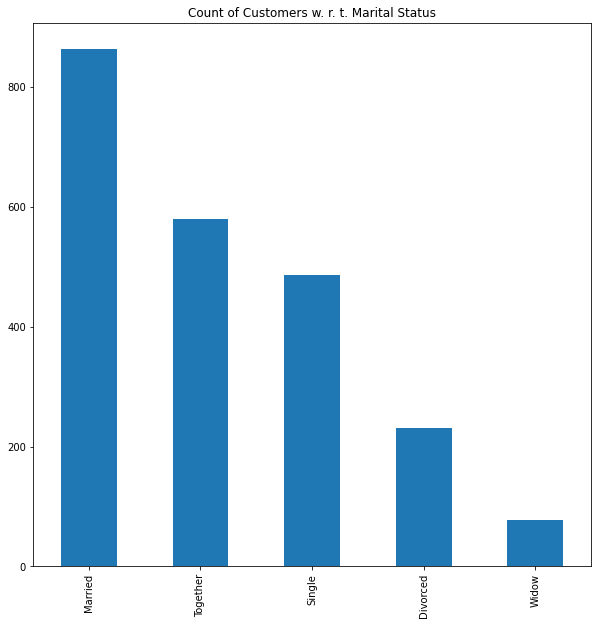

In [ ]:
df.Marital_Status.value_counts().plot(kind="bar", figsize=(10, 10), title='Count of Customers w. r. t. Marital Status')

### Income w. r. t. Marital Status



In [ ]:
df.groupby(['Marital_Status'])['Income'].sum().sort_values(ascending=False)

Marital_Status
Married     44687977.5
Together    30785829.5
Single      24794023.5
Divorced    12220901.0
Widow        4343979.5
Name: Income, dtype: float64

Here we can see that customers who are married couples have the greatest total of income followed by couples who are living together and single person.

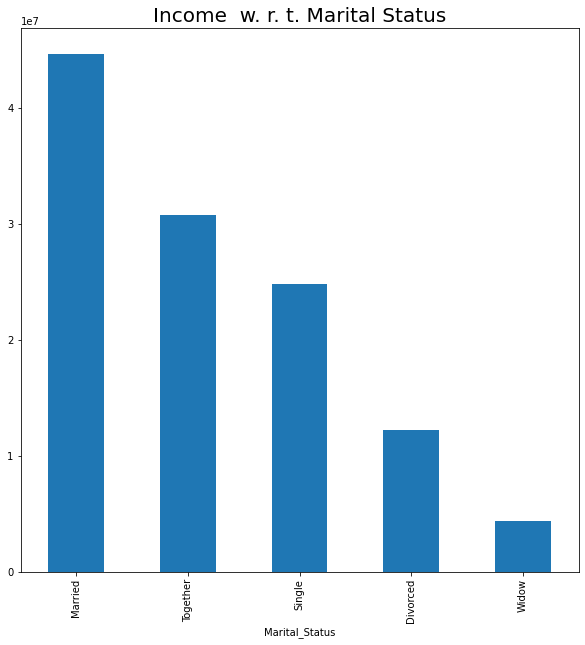

In [ ]:
plt.title("Income  w. r. t. Marital Status", fontsize=20)

df.groupby(['Marital_Status'])['Income'].sum().sort_values(ascending=False).plot(kind="bar", figsize=(10, 10))

Married Couples have the highest total of income followed by couples living together and single customers.

### Total sales w. r. t. Marital Status

In [ ]:
df.groupby(['Marital_Status'])['Total_Sales'].sum().sort_values(ascending=False)

Marital_Status
Married     510453
Together    351012
Single      295093
Divorced    141601
Widow        56889
Name: Total_Sales, dtype: int64

In [ ]:
ts_m=df.groupby(['Marital_Status'])['Total_Sales'].sum().sort_values(ascending=False)
ts_m=pd.DataFrame(ts_m)
ts_m

,Total_Sales
Marital_Status,
Married,510453
Together,351012
Single,295093
Divorced,141601
Widow,56889


We can see that customers who are Married couples (who also have the highest income) have the highest sales followed by couples living together and single people.

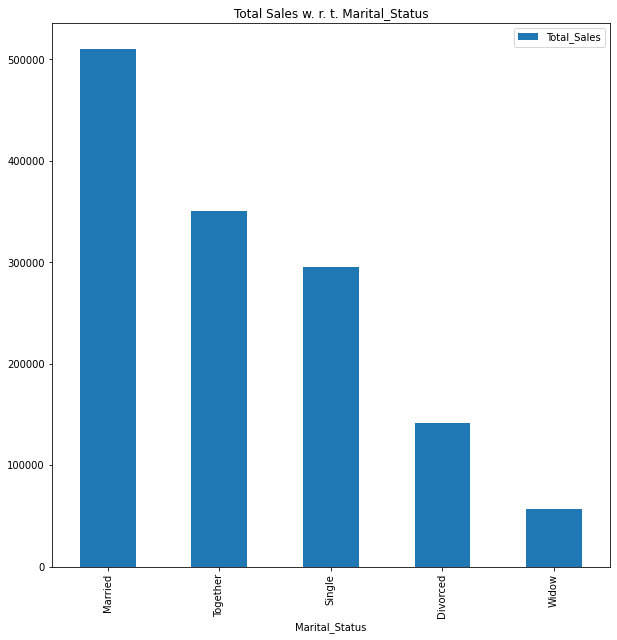

In [ ]:
ts_m.plot(kind="bar",  figsize=(10, 10), title="Total Sales w. r. t. Marital_Status")

### Purchase w. r. t. Marital Status

In [ ]:
tp_ms=df.groupby(['Marital_Status'])['Total_Purchase'].sum().sort_values(ascending=False)
tp_ms=pd.DataFrame(tp_ms)

tp_ms

,Total_Purchase
Marital_Status,
Married,12922
Together,8579
Single,6950
Divorced,3529
Widow,1286


Text(0.5, 1.0, 'Total Purchase w. r. t. Marital Status')

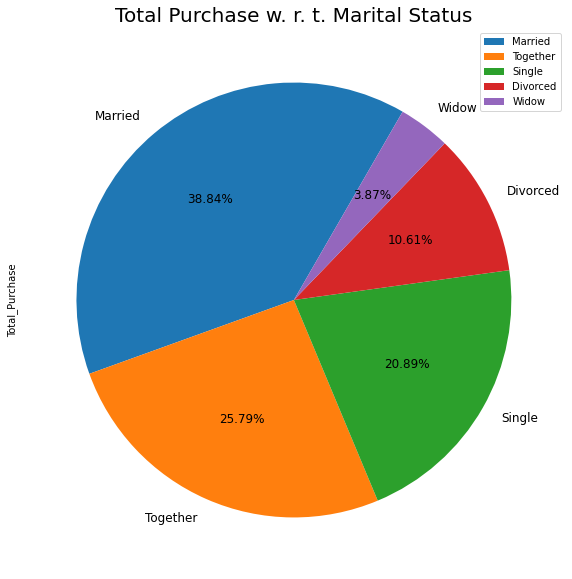

In [ ]:
tp_ms.plot.pie(y="Total_Purchase", autopct='%1.2f%%',figsize=(15,10), fontsize=12,startangle=60)
plt.title('Total Purchase w. r. t. Marital Status', size=20)

Married couples have made the highest number of purchase followed by couples who are living together and single customers. 

 ## Analysis w. r. t. Education Class

### Income w. r. t. Education Class

In [ ]:
df.groupby(['Education'])['Income'].sum().sort_values(ascending=False)

Education
Graduation    59401133.5
2nd Cycle     56335039.5
Basic          1096538.0
Name: Income, dtype: float64

Text(0.5, 1.0, 'Total Income w. r. t. Education Class')

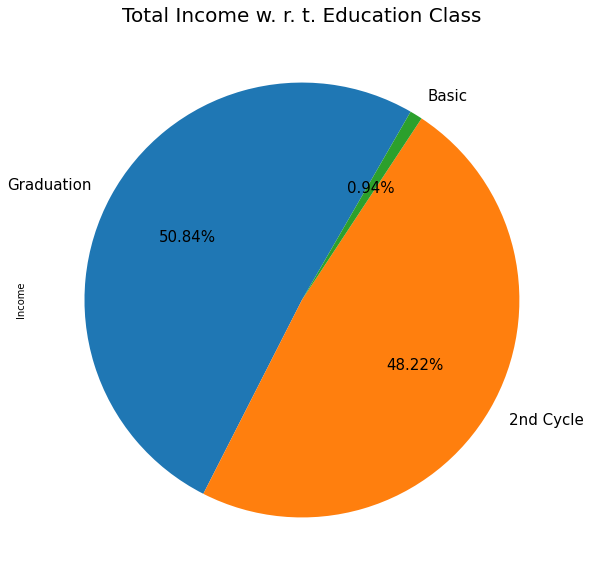

In [ ]:
df.groupby(['Education'])['Income'].sum().sort_values(ascending=False).plot(kind="pie",autopct='%1.2f%%',figsize=(10,10),fontsize=15,startangle=60)
plt.title('Total Income w. r. t. Education Class', size=20)

Here we can see that customers with Graduate degrees have highest total of income followed by customers who possess a 2nd cycle degree.

### Total Sales w. r. t. Education Class

In [ ]:
ts_ed=df.groupby(['Education'])['Total_Sales'].sum().sort_values(ascending=False)

ts_ed=pd.DataFrame(ts_ed)

ts_ed

,Total_Sales
Education,
Graduation,698626
2nd Cycle,652005
Basic,4417


Text(0.5, 1.0, 'Total Sales w. r. t. Education Class')

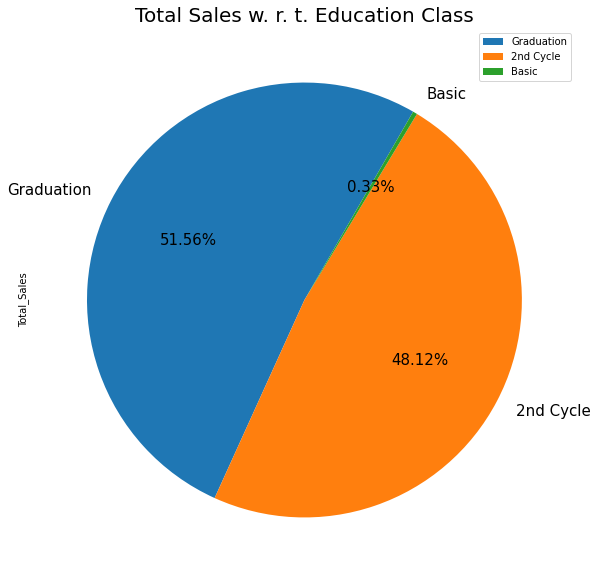

In [ ]:
ts_ed.plot.pie(y="Total_Sales", autopct='%1.2f%%',figsize=(10,10), fontsize=15,  startangle=60)
plt.title('Total Sales w. r. t. Education Class', size=20)

Here we can see that customers with Graduate degrees have made the greatest total of sales followed by customers who possess a 2nd cycle degree.

### Purchase w. r. t. Education Class



In [ ]:
tp_ed=df.groupby(['Education'])['Total_Purchase'].sum().sort_values(ascending=False)
tp_ed=pd.DataFrame(tp_ed)

tp_ed

,Total_Purchase
Education,
Graduation,16894
2nd Cycle,15993
Basic,379


Text(0.5, 1.0, 'Total Purchase w. r. t. Education Class')

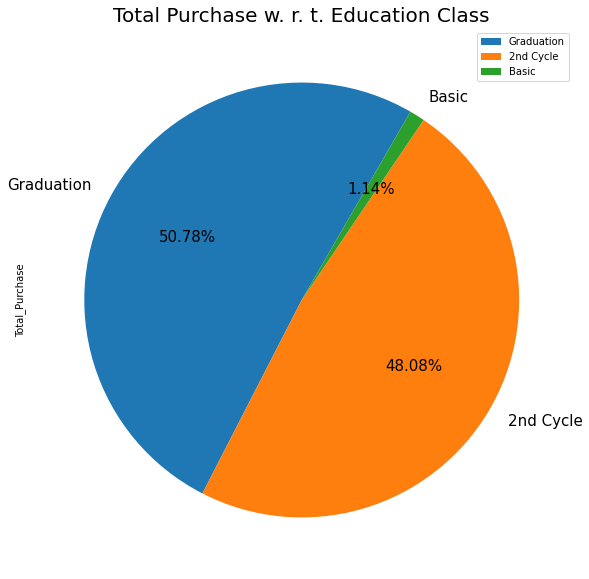

In [ ]:
tp_ed.plot.pie(y="Total_Purchase", autopct='%1.2f%%',figsize=(10,10),  fontsize=15,  startangle=60)
plt.title('Total Purchase w. r. t. Education Class', size=20)

In [ ]:
import plotly.express as px

ed=("Graduation", "2nd Cycle", "Basic")

fig = px.pie(tp_ed,names=ed,values='Total_Purchase', title="Total Purchase w. r. t. Education Class", color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20 )

fig.show()

Here we can see that customers with Graduate degrees have made the greatest total number of purchases followed by customers who possess a 2nd cycle degree.

## Analysis w. r. t. Income Bracket

### Income w. r. t. Income Bracket

In [ ]:
il_i=df.groupby(['Income_level'])['Income'].sum().sort_values(ascending=False)
il_i=pd.DataFrame(il_i)
il_i

,Income
Income_level,
$50K-$75K,50874391.0
$25K-$50K,30905770.0
Above $75K,30620125.0
Below $25K,4432425.0


Text(0.5, 1.0, 'Income w. r. t. Income Bracket')

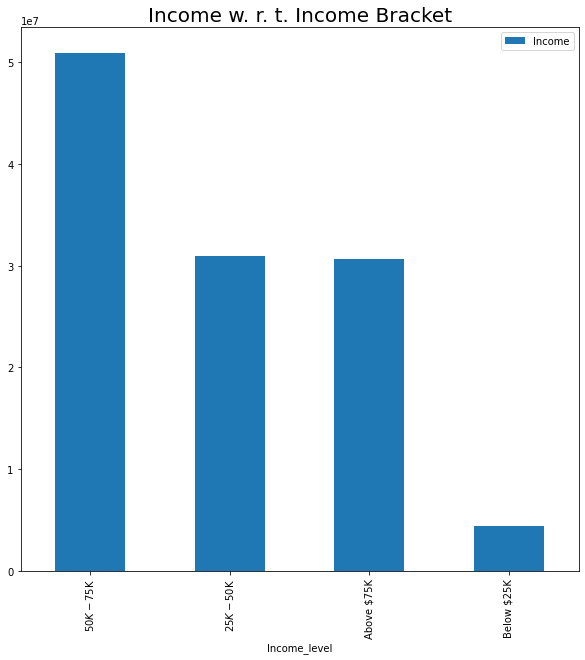

In [ ]:
il_i.plot(kind="bar", figsize=(10, 10))

plt.title("Income w. r. t. Income Bracket", fontsize=20)

### Total Sales w. r. t. Income Bracket

In [ ]:
df['Income_level'].value_counts()

$50K-$75K     820
$25K-$50K     817
Above $75K    358
Below $25K    242
Name: Income_level, dtype: int64

Text(0.5, 1.0, 'Count of Customers w. r. t. Income Bracket')

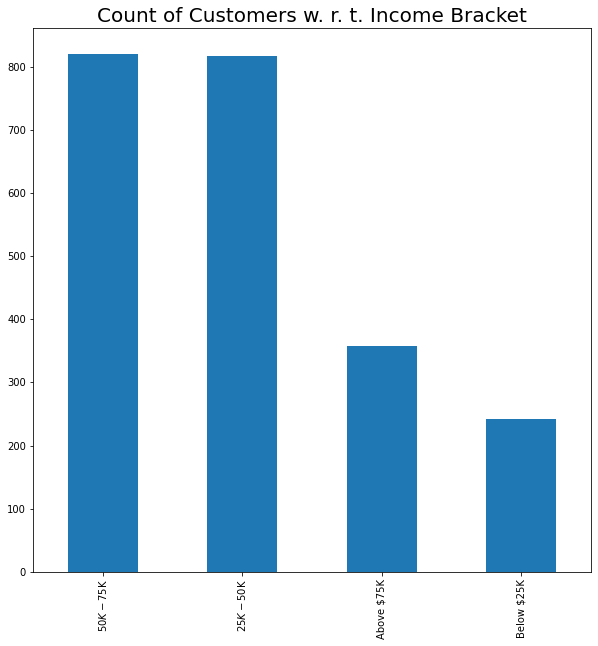

In [ ]:
df['Income_level'].value_counts().plot(kind="bar",  figsize=(10, 10))

plt.title("Count of Customers w. r. t. Income Bracket", fontsize=20)

In [ ]:
il_ts=df.groupby(['Income_level'])['Total_Sales'].sum().sort_values(ascending=False)
il_ts=pd.DataFrame(il_ts)
il_ts

,Total_Sales
Income_level,
$50K-$75K,687434
Above $75K,510755
$25K-$50K,139441
Below $25K,17418


Text(0.5, 1.0, 'Total Sales w. r. t. Income Bracket')

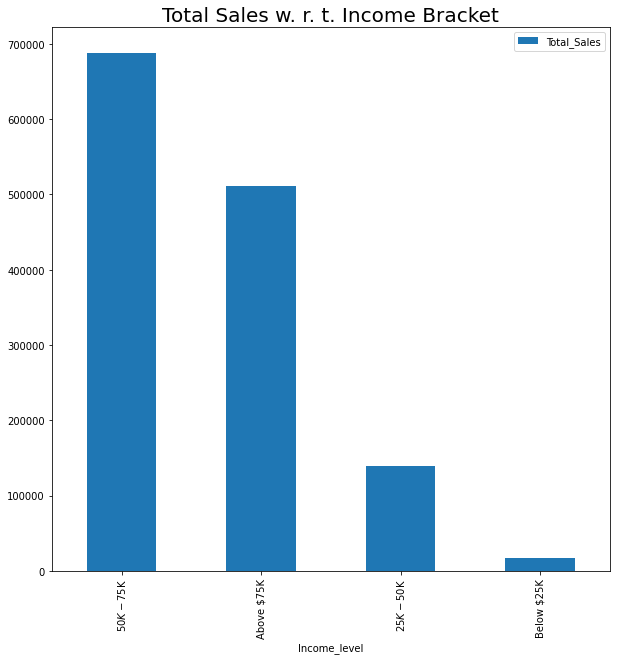

In [ ]:
il_ts.plot(kind="bar", figsize=(10, 10))
plt.title("Total Sales w. r. t. Income Bracket", fontsize=20)

Customers that fall within the range of $50K-$75K Income bracket account for the highest total sales followed by those who fall above $75K range and within $25K to $50K range.

### Purchase w. r. t. Income Bracket

In [ ]:
il_p=df.groupby(['Income_level'])['Total_Purchase'].sum().sort_values(ascending=False)
il_p=pd.DataFrame(il_p)
il_p

,Total_Purchase
Income_level,
$50K-$75K,15976
$25K-$50K,8020
Above $75K,7452
Below $25K,1818


Text(0.5, 1.0, 'Total Purhcase w. r. t. Income Bracket')

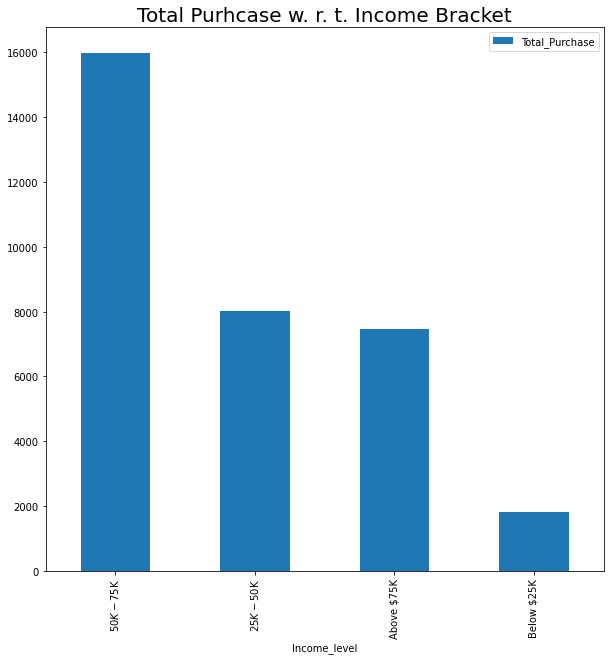

In [ ]:
il_p.plot(kind="bar", figsize=(10, 10))
plt.title("Total Purhcase w. r. t. Income Bracket", fontsize=20)

Customers that fall within the range of $50K-$75K Income bracket have made the most purchases followed by those who fall within $25K-$50K and Above $75K.

## Analysis w. r. t. Country

### Income w. r. t. Country

In [ ]:
df.groupby(['Marital_Status'])['Income'].sum().sort_values(ascending=False)

Marital_Status
Married     44687977.5
Together    30785829.5
Single      24794023.5
Divorced    12220901.0
Widow        4343979.5
Name: Income, dtype: float64

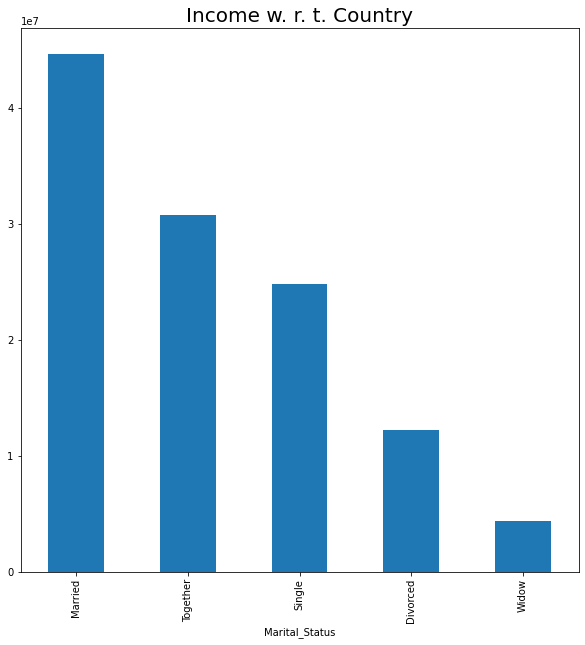

In [ ]:
plt.title("Income w. r. t. Country", fontsize=20)

df.groupby(['Marital_Status'])['Income'].sum().sort_values(ascending=False).plot(kind="bar", figsize=(10, 10))

### Total Sales w. r. t. Country

In [ ]:
df.groupby(['Country'])['Total_Sales'].sum().sort_values(ascending=False)

Country
SP     660367
SA     211049
CA     168532
AUS     89763
IND     79420
GER     74913
US      67882
ME       3122
Name: Total_Sales, dtype: int64

([<matplotlib.axis.YTick at 0x7f51b1659850>,
 [Text(0, 0, '0'),
  Text(0, 0, '100K'),
  Text(0, 0, '200K'),
  Text(0, 0, '300K'),
  Text(0, 0, '400K'),
  Text(0, 0, '500K'),
  Text(0, 0, '600K')])

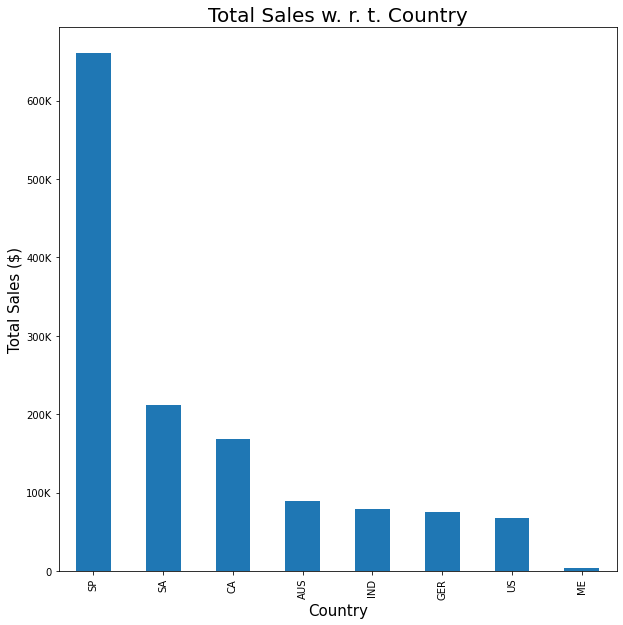

In [ ]:
plt.figure(figsize=(10, 10))

df.groupby(['Country'])['Total_Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales w. r. t. Country', size=20)
plt.xlabel('Country', size=15)
plt.ylabel('Total Sales ($)', size=15)
plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000], ["0","100K","200K", "300K", "400K", "500K","600K"])


Here we can see that Spain has the highest total sales followed by South Africa and Canada.

### Purchase w. r. t. Country

In [ ]:
df.groupby(['Country'])['Total_Purchase'].sum().sort_values(ascending=False)

Country
SP     16037
SA      5113
CA      4101
AUS     2314
IND     2093
GER     1788
US      1761
ME        59
Name: Total_Purchase, dtype: int64

([<matplotlib.axis.YTick at 0x7f51b1634250>,
 [Text(0, 0, '0'),
  Text(0, 0, '2K'),
  Text(0, 0, '4K'),
  Text(0, 0, '6K'),
  Text(0, 0, '8K'),
  Text(0, 0, '10K'),
  Text(0, 0, '12K'),
  Text(0, 0, '14K'),
  Text(0, 0, '16K')])

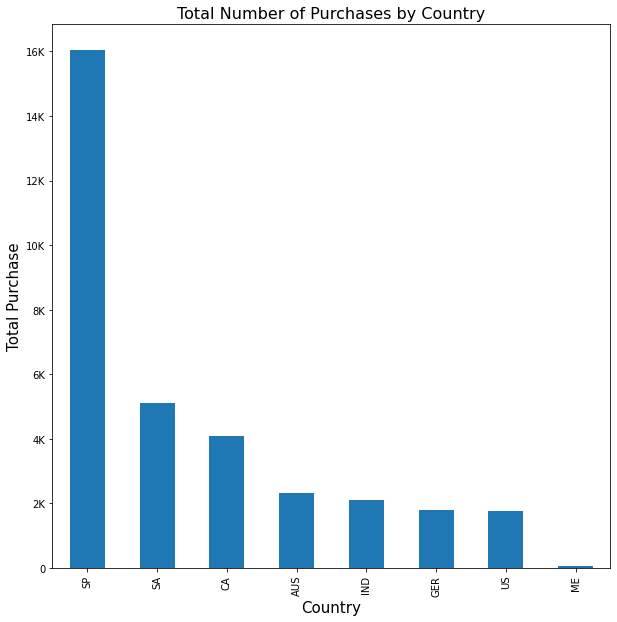

In [ ]:
plt.figure(figsize=(10, 10))

df.groupby(['Country'])['Total_Purchase'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Number of Purchases by Country', size=16)
plt.xlabel('Country', size=15)
plt.ylabel('Total Purchase', size=15)

plt.yticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000], ["0","2K","4K", "6K", "8K", "10K","12K","14K", "16K"])

Customers from Spain have made the highest number of purchase followed by South Africa and Canada.

### Contrast between Total Purchase and Purchase per Person

In [ ]:
totalpur =df.groupby('Country').agg(np.sum).filter(regex='Total_Purchase')
totalpur['People'] = df['Country'].value_counts()
totalpur['Purch_Per_Person'] = round(totalpur['Total_Purchase']/totalpur['People'],2)
totalpur = totalpur.sort_values(by=['Total_Purchase'])
totalpur

,Total_Purchase,People,Purch_Per_Person
Country,,,
ME,59,3,19.67
US,1761,109,16.16
GER,1788,120,14.90
IND,2093,147,14.24
AUS,2314,160,14.46
CA,4101,268,15.30
SA,5113,336,15.22
SP,16037,1094,14.66


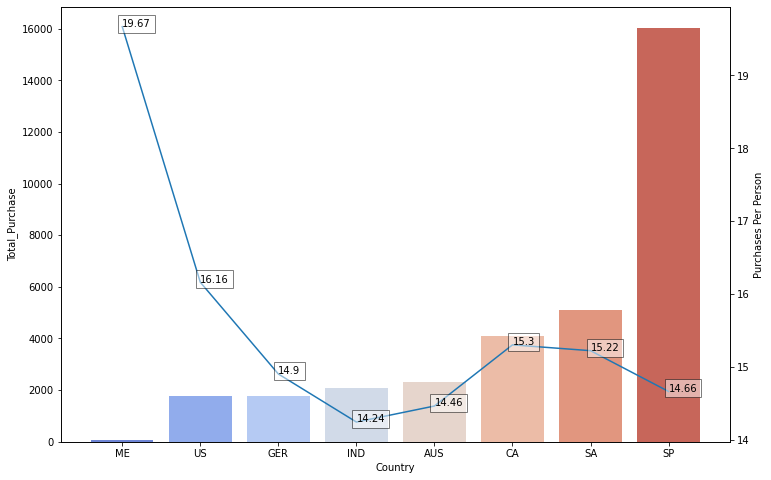

In [ ]:
plt.figure(figsize=(12,8))
ax = sb.barplot(x=totalpur.index,y=totalpur.Total_Purchase,palette='coolwarm')
#plt.bar_label(ax.containers[0],padding=0)
ax2 = ax.twinx()
ax2 = sb.lineplot(x=totalpur.index,y=totalpur.Purch_Per_Person)
ax2.set_ylabel('Purchases Per Person')
for i in range(8):
    plt.text(i,totalpur['Purch_Per_Person'][i],totalpur['Purch_Per_Person'][i],bbox=dict(facecolor='white', alpha=0.5))

Customers from Spain (SP) have made the highest  number of purchases as well as have spent the most dollars on purchases.

However, the highest number of total purchase per person is carried out by Montenegro followed by the US.

## Quarterly Sales

Text(0.5, 1.0, 'Total Sales w. r. t. Quarters')

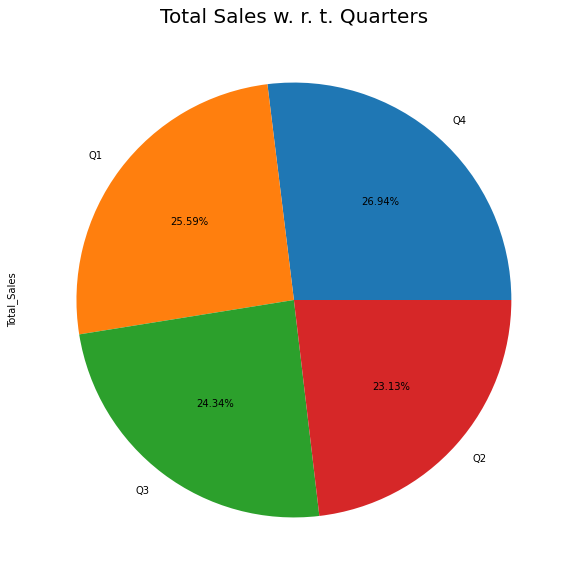

In [ ]:
#plt.figure(figsize=(10, 10))

df.groupby(['Quarter'])['Total_Sales'].sum().sort_values(ascending=False).plot(kind='pie',autopct='%1.2f%%',figsize=(10,10))
plt.title('Total Sales w. r. t. Quarters', size=20)



The last quarter (Q4) has the highest total sales over the past two years followed by the first quarter (Q1)

Overall, there is not much difference between the total sales in each quarter if compared.

## Comparison of Marketing Campaign Success

### Which marketing campaign is the most successful?

In [ ]:
cmpg = df.filter(regex='Cmp').sum().sort_values(ascending=False)
cmpg = pd.DataFrame(cmpg)
cmpg = cmpg.reset_index()
cmpg

,index,0
0,LastCmp,334
1,AcceptedCmp4,167
2,AcceptedCmp3,163
3,AcceptedCmp5,162
4,AcceptedCmp1,144
5,AcceptedCmp2,30


In [ ]:
import plotly.express as px
fig = px.pie(cmpg,names='index',values=0, color_discrete_sequence=px.colors.sequential.dense, title="Most Successful Marketing Campaign")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Here we can see that the last campaign (LastCmp) was the most successful.

### Success Rate
We can define success rate of a campaign as the percentage of customers who accepted that campaign or subscribed to the services or made a purchase in that campaign.  

In [ ]:
# calculate success rate (percent accepted)
campaign_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'LastCmp']].mean()*100, columns=['Percent']).reset_index()

campaign_success.sort_values(by = 'Percent', ascending=False)

,index,Percent
5,LastCmp,14.930711
3,AcceptedCmp4,7.465355
2,AcceptedCmp3,7.286544
4,AcceptedCmp5,7.241842
0,AcceptedCmp1,6.437193
1,AcceptedCmp2,1.341082


Text(0, 0.5, 'Campaign Name')

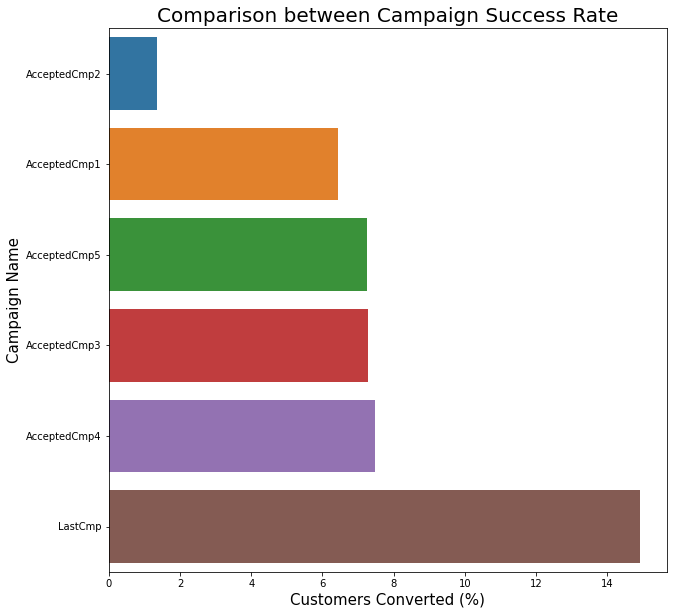

In [ ]:
# plot
plt.figure(figsize=(10, 10))

sb.barplot(data=campaign_success.sort_values('Percent'), x="Percent", y="index")

#sb.barplot(x='Percent', y='index', data=campaign_success.sort_values('Percent'), palette='Blues')

plt.title('Comparison between Campaign Success Rate', size=20);
plt.xlabel('Customers Converted (%)',fontsize = 15)
plt.ylabel('Campaign Name',fontsize = 15)

We observe again that  that the last campaign (LastCmp) was the most successful in terms of campaign success rate.

### Customers Acceptance of Last Campaign w. r. t. Country
Country with the most number of customers who accepted the last campaign.

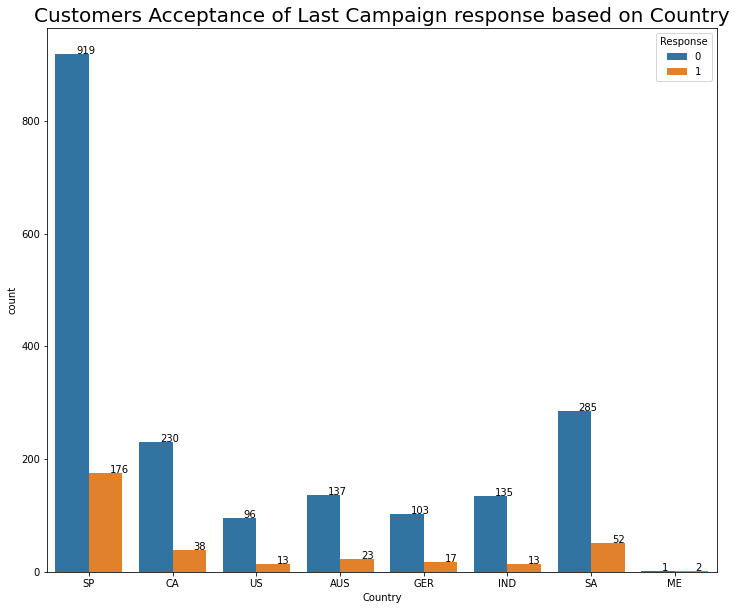

In [ ]:
plt.figure(figsize=(12,10))
cs = sb.countplot(x='Country',hue='Response',data=data)
plt.title('Customers Acceptance of Last Campaign response based on Country', size= 20)
for p in cs.patches: 
    cs.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

Spain has the highest acceptance in the last campaign followed by Canada and United States

## Relationship between Country and Success of Campaign

In [ ]:
geo = df[['Country','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'LastCmp']]
geo = geo.groupby('Country').sum()
geo['Total'] = df['Country'].value_counts()
geo = geo[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'LastCmp']].div(geo.Total, axis=0)
geo = round(geo.multiply(100),3)
geo

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,LastCmp
Country,,,,,,
AUS,4.375,0.000,5.625,3.750,8.125,14.375
CA,6.716,2.239,6.716,8.955,7.836,14.179
GER,5.833,1.667,8.333,9.167,6.667,14.167
IND,4.762,1.361,8.844,7.483,4.082,8.844
ME,0.000,0.000,33.333,0.000,0.000,66.667
SA,5.952,1.190,6.250,5.952,6.250,15.476
SP,7.130,1.463,7.587,8.135,8.044,16.088
US,6.422,0.000,7.339,5.505,4.587,11.927


In [ ]:
geo = geo.melt(ignore_index=False)
geo = geo.reset_index()

In [ ]:
geo

,Country,variable,value
0,AUS,AcceptedCmp1,4.375
1,CA,AcceptedCmp1,6.716
2,GER,AcceptedCmp1,5.833
3,IND,AcceptedCmp1,4.762
4,ME,AcceptedCmp1,0.000
5,SA,AcceptedCmp1,5.952
6,SP,AcceptedCmp1,7.130
7,US,AcceptedCmp1,6.422
8,AUS,AcceptedCmp2,0.000
9,CA,AcceptedCmp2,2.239


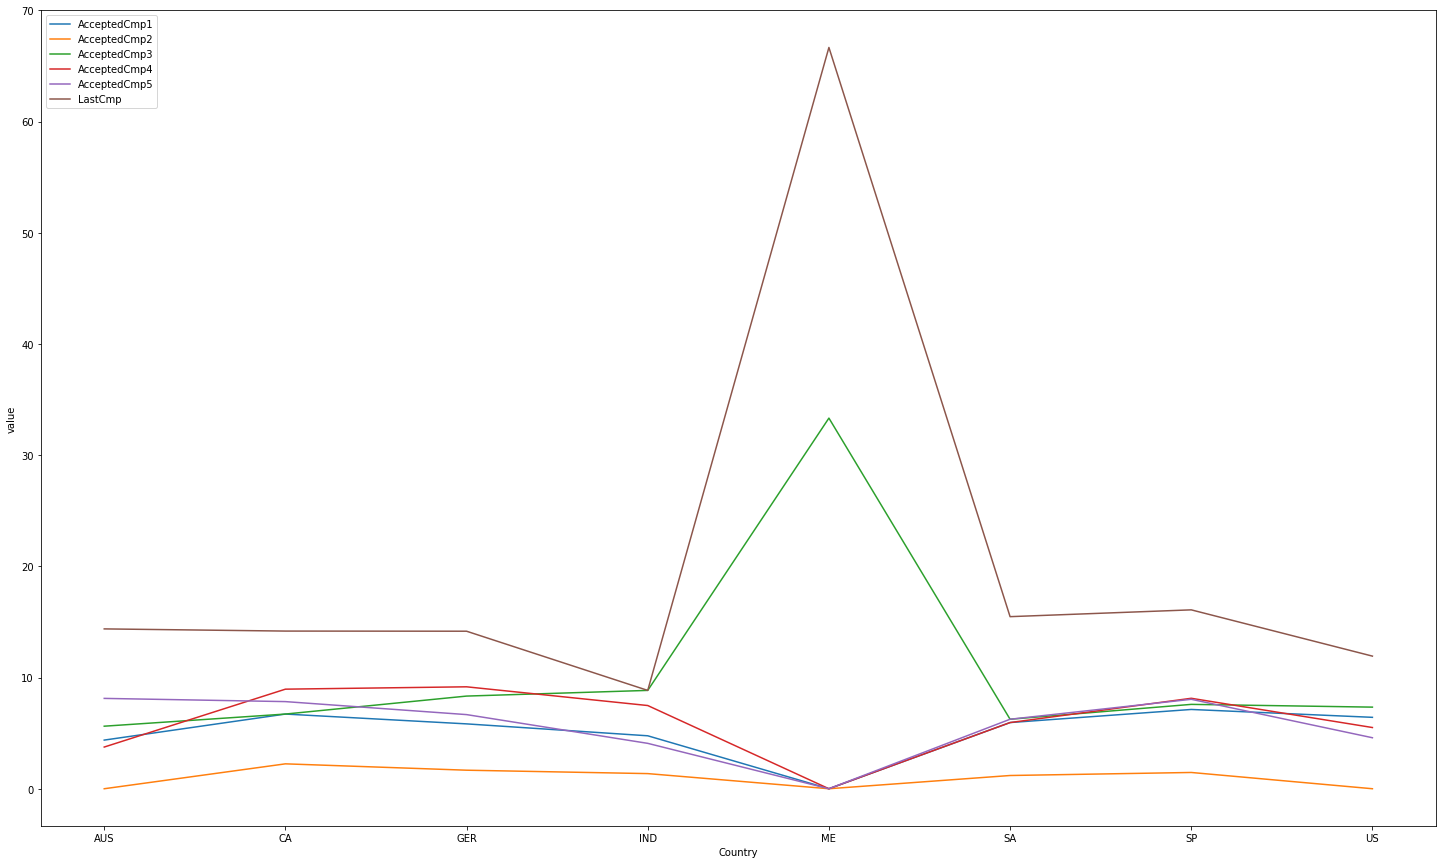

In [ ]:
plt.figure(figsize=(25, 15))
ax1 = sb.lineplot(x='Country', y='value',hue='variable',data=geo)
ax1.legend(loc='upper left')

There does not seem to be a relationship between the success of a campaign and geographical region.

## Best Performing Products w. r. t. Sales

In [ ]:
best_prod = pd.DataFrame(df.iloc[:,9:15].sum(),columns=['Total_Sales']).reset_index()
best_prod

,index,Total_Sales
0,MntWines,680038
1,MntFruits,58767
2,MntMeatProducts,373393
3,MntFishProducts,83939
4,MntSweetProducts,60553
5,MntGoldProds,98358


In [ ]:
plt.figure(figsize=(10, 10))
px.pie(best_prod,names='index',values='Total_Sales', title="Best Performing Products w. r. t. Sales")
#fig = px.pie(best_products,names='index',values=0, color_discrete_sequence=px.colors.sequential.dense)


<Figure size 720x720 with 0 Axes>

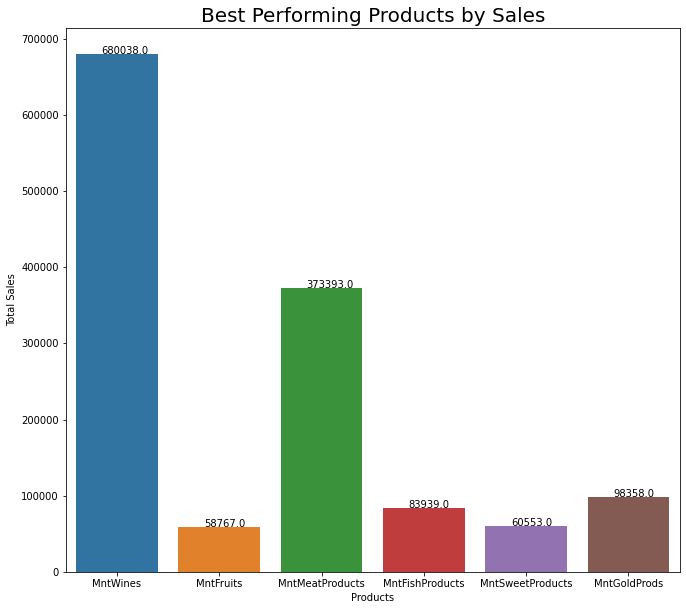

In [ ]:
plt.figure(figsize=(11,10))
plt.title("Best Performing Products by Sales", size=20)
yyx= sb.barplot(x='index',y='Total_Sales',data=best_prod);
plt.xlabel('Products')
plt.ylabel('Total Sales')
for p in yyx.patches: 
    yyx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

Wine is the best performing product followed by Meat and Gold.

## Channel Performance

In [ ]:
channel =df.filter(regex='Purch').sum().sort_values(ascending=False)
channel= pd.DataFrame(channel)
channel= channel.reset_index()
channel

,index,0
0,Total_Purchase,33266
1,NumStorePurchases,12962
2,NumWebPurchases,9143
3,NumCatalogPurchases,5956
4,NumDealsPurchases,5205


In [ ]:
#Dropping Total_Purhcase
channel_perf = channel.drop(0)
channel_perf

,index,0
1,NumStorePurchases,12962
2,NumWebPurchases,9143
3,NumCatalogPurchases,5956
4,NumDealsPurchases,5205


In [ ]:
channel_perf. rename(columns = {0:'count'}, inplace = True)
channel_perf

,index,count
1,NumStorePurchases,12962
2,NumWebPurchases,9143
3,NumCatalogPurchases,5956
4,NumDealsPurchases,5205


In [ ]:
channel_perf

,index,count
1,NumStorePurchases,12962
2,NumWebPurchases,9143
3,NumCatalogPurchases,5956
4,NumDealsPurchases,5205


In [ ]:
import plotly.express as px

px.pie(channel_perf,names='index',values='count', title="Purchase w. r. t. Channels")
#fig = px.pie(best_products,names='index',values=0, color_discrete_sequence=px.colors.sequential.dense)
#chart.show()

([<matplotlib.axis.YTick at 0x7f51af98cc40>,
 [Text(0, 0, '0'),
  Text(0, 0, '2K'),
  Text(0, 0, '4K'),
  Text(0, 0, '6K'),
  Text(0, 0, '8K'),
  Text(0, 0, '10K'),
  Text(0, 0, '12K')])

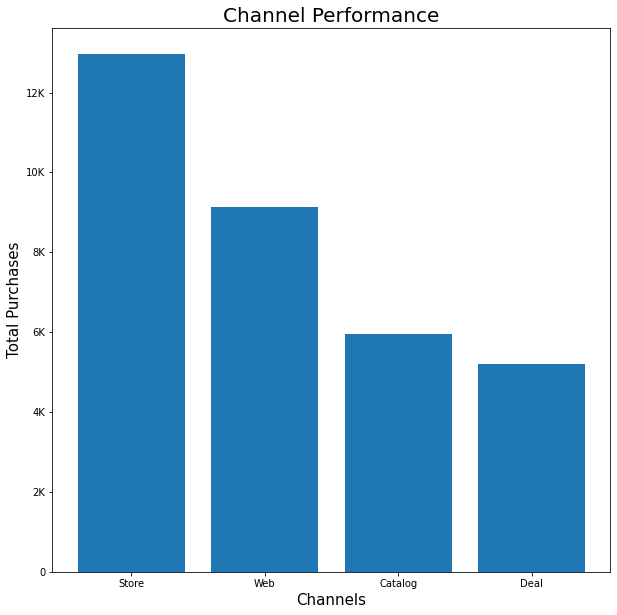

In [ ]:
plt.figure(figsize=(10, 10))

plt.bar( channel_perf['index'],channel_perf['count'])
plt.title('Channel Performance', size=20)
plt.xlabel('Channels',fontsize = 15)
plt.ylabel('Total Purchases',fontsize = 15)

plt.xticks(['NumStorePurchases', 'NumWebPurchases','NumCatalogPurchases','NumDealsPurchases'], ["Store","Web","Catalog", "Deal"])
plt.yticks([0, 2000, 4000, 6000, 8000, 10000,12000], ["0","2K","4K", "6K", "8K", "10K","12K"])

Store is the best performing channel followed by Web and Catalog

## Website Conversion Analysis

Now we will calculate the average purchase per visit by a customer on store website

In [ ]:
#Average purchase(s) per visit on the web

df ['Web_Conv'] = round(df['NumWebPurchases']/df['NumWebVisitsMonth'],3)
df.fillna({'Web_Conv' : 0},inplace=True) 
# Handling for cases where division by 0 may yield unwanted results
df.replace(np.inf,0,inplace=True)
df ['Web_Conv'].sum()

<ipython-input-48-23d377e2d8c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['Web_Conv'] = round(df['NumWebPurchases']/df['NumWebVisitsMonth'],3)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

2429.5730000000003

### Website Conversion w. r. t. Country

In [ ]:
df.groupby('Country')['Web_Conv'].mean().sort_values(ascending=False)

Country
ME     1.500000
AUS    1.239025
CA     1.092877
SA     1.091137
SP     1.082102
GER    1.044792
US     1.019275
IND    1.000136
Name: Web_Conv, dtype: float64

Text(0, 0.5, 'Number of Conversion')

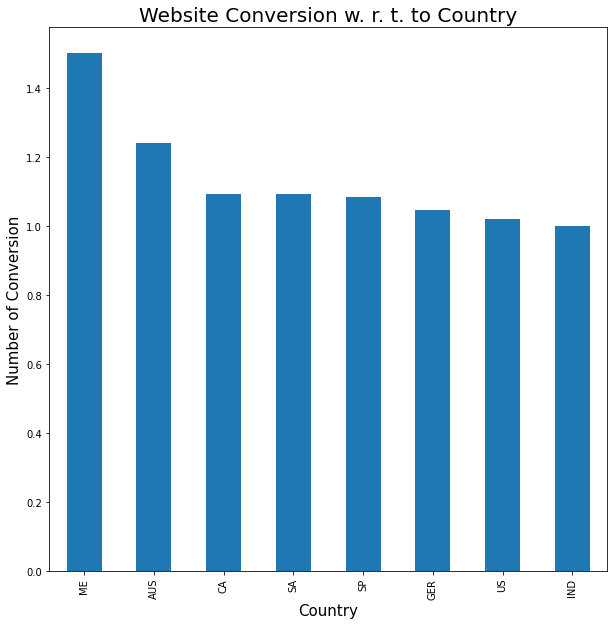

In [ ]:
plt.figure(figsize=(10, 10))

df.groupby('Country')['Web_Conv'].mean().sort_values(ascending=False).plot(kind="bar")

plt.title('Website Conversion w. r. t. to Country', size=20);
plt.xlabel('Country',fontsize = 15)
plt.ylabel('Number of Conversion',fontsize = 15)


### Website Conversion w. r. t. Marital Status

In [ ]:
df.groupby('Marital_Status')['Web_Conv'].mean().sort_values(ascending=False)

Marital_Status
Married     920.496
Together    606.532
Single      560.560
Divorced    245.085
Widow        96.900
Name: Web_Conv, dtype: float64

Text(0, 0.5, 'Number of Conversion')

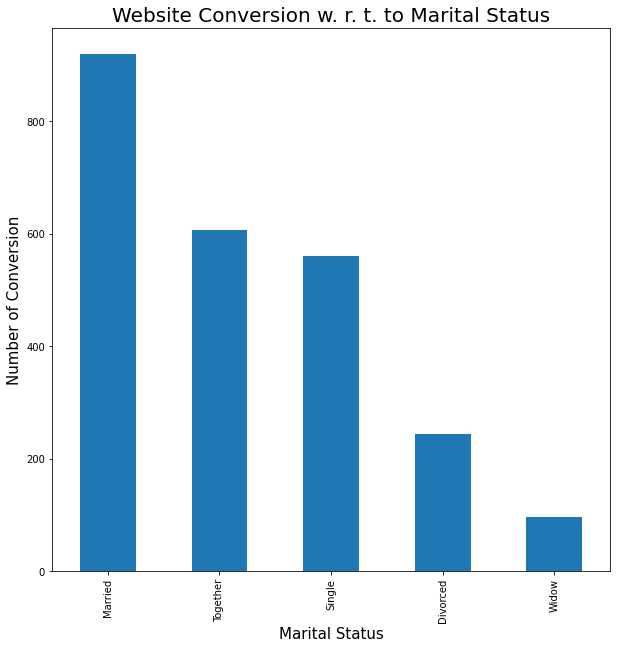

In [ ]:
plt.figure(figsize=(10, 10))

df.groupby('Marital_Status')['Web_Conv'].mean().sort_values(ascending=False).plot(kind="bar")

plt.title('Website Conversion w. r. t. to Marital Status', size=20);
plt.xlabel('Marital Status',fontsize = 15)
plt.ylabel('Number of Conversion',fontsize = 15)


### Website Conversion w. r. t. Education Class

In [ ]:
df.groupby('Education')['Web_Conv'].mean().sort_values(ascending=False)

Education
Graduation    1280.552
2nd Cycle     1134.336
Basic           14.685
Name: Web_Conv, dtype: float64

Text(0.5, 1.0, 'Website Conversion w. r. t. to Education Class')

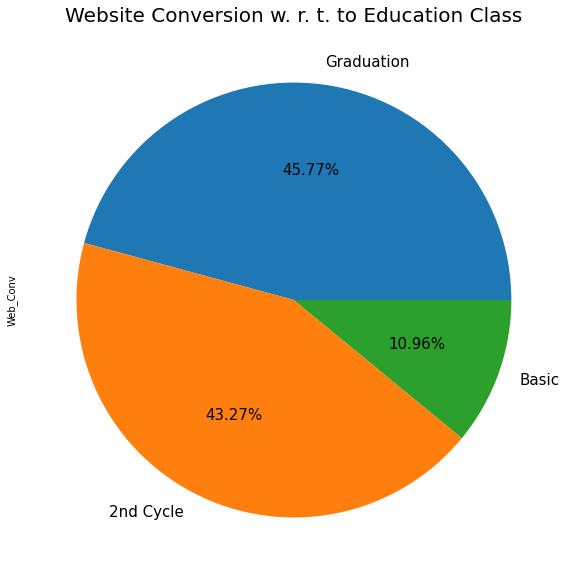

In [ ]:
plt.figure(figsize=(10, 10))
df.groupby('Education')['Web_Conv'].mean().sort_values(ascending=False).plot(kind="pie", autopct='%1.2f%%', fontsize=15) 
plt.title('Website Conversion w. r. t. to Education Class', size=20)

### Website Conversion w. r. t. Income Bracket

In [ ]:
df.groupby('Income_level')['Web_Conv'].mean().sort_values(ascending=False)

Income_level
Above $75K    2.442916
$50K-$75K     1.361707
$25K-$50K     0.427854
Below $25K    0.367157
Name: Web_Conv, dtype: float64

Text(0.5, 1.0, 'Website Conversion w. r. t. Income Bracket')

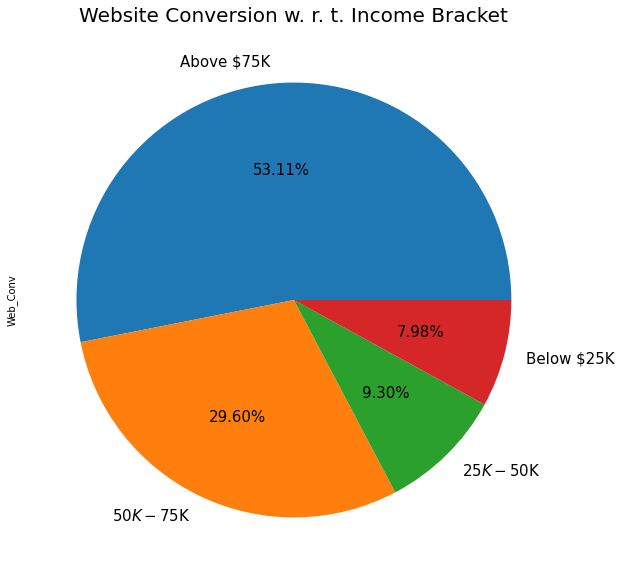

In [ ]:
plt.figure(figsize=(10, 10))
df.groupby('Income_level')['Web_Conv'].mean().sort_values(ascending=False).plot(kind="pie", autopct='%1.2f%%', fontsize=15)
plt.title('Website Conversion w. r. t. Income Bracket', size=20)

## Analysis of Complains

In [ ]:
df["Complain"].value_counts()

0    2217
1      20
Name: Complain, dtype: int64

* 1 denotes a complain has been made.
*0 denotes there is no complain.   



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



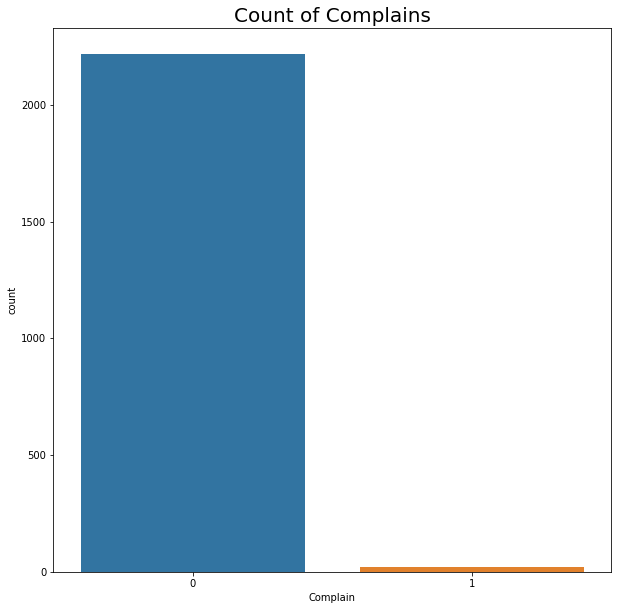

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Count of Complains", size =20)
sb.countplot(df["Complain"])

## Total Complains w. r. t. Quarters

In [ ]:
df.groupby('Quarter')['Complain'].sum().sort_values(ascending=False)

Quarter
Q1    8
Q3    6
Q4    5
Q2    1
Name: Complain, dtype: int64

Text(0.5, 1.0, 'Total Complains w. r. t. Quarters')

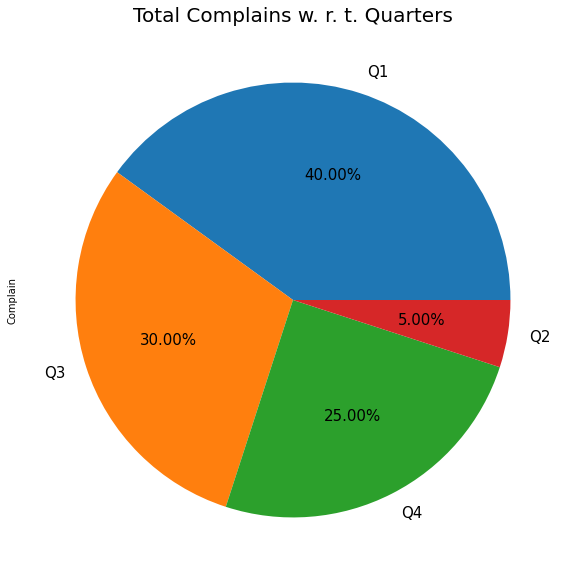

In [ ]:
qrt_cmp=df.groupby('Quarter')['Complain'].sum().sort_values(ascending=False)
qrt_cmp.plot(kind="pie",autopct='%1.2f%%', fontsize=15, figsize=(10,10))
plt.title('Total Complains w. r. t. Quarters', size=20)

## Total Complains w. r. t. Marital Status

In [ ]:
df.groupby('Marital_Status')['Complain'].sum().sort_values(ascending=False)

Marital_Status
Married     8
Single      6
Together    5
Divorced    1
Widow       0
Name: Complain, dtype: int64

Text(0.5, 1.0, 'Total Complains w. r. t. Marital Status')

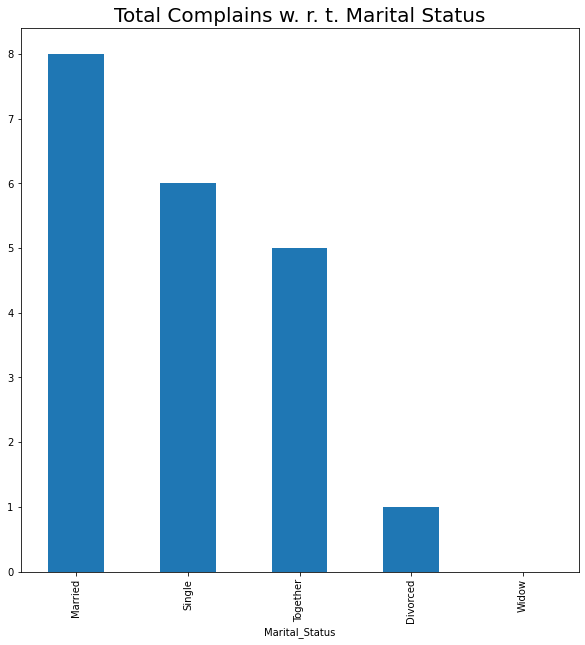

In [ ]:
df.groupby('Marital_Status')['Complain'].sum().sort_values(ascending=False).plot(kind="bar", figsize=(10, 10))
plt.title('Total Complains w. r. t. Marital Status', size=20)

### Total Complain w. r. t. Education Class

In [ ]:
df.groupby('Education')['Complain'].sum().sort_values(ascending=False)

Education
Graduation    14
2nd Cycle      6
Basic          0
Name: Complain, dtype: int64

Text(0.5, 1.0, 'Total Complains w. r. t. Education Class')

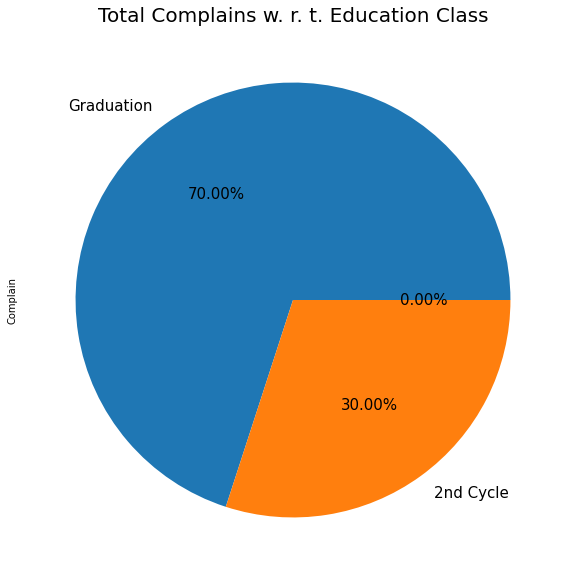

In [ ]:
df.groupby('Education')['Complain'].sum().sort_values(ascending=False).plot(kind="pie", autopct='%1.2f%%', fontsize=15, figsize=(10,10))
plt.title('Total Complains w. r. t. Education Class', size=20)

### Total Complain w. r. t. Income Bracket

In [ ]:
df.groupby('Income_level')['Complain'].sum().sort_values(ascending=False)

Income_level
$25K-$50K     10
$50K-$75K      5
Below $25K     3
Above $75K     2
Name: Complain, dtype: int64

Text(0.5, 1.0, 'Total Complains w. r. t. Income Bracket')

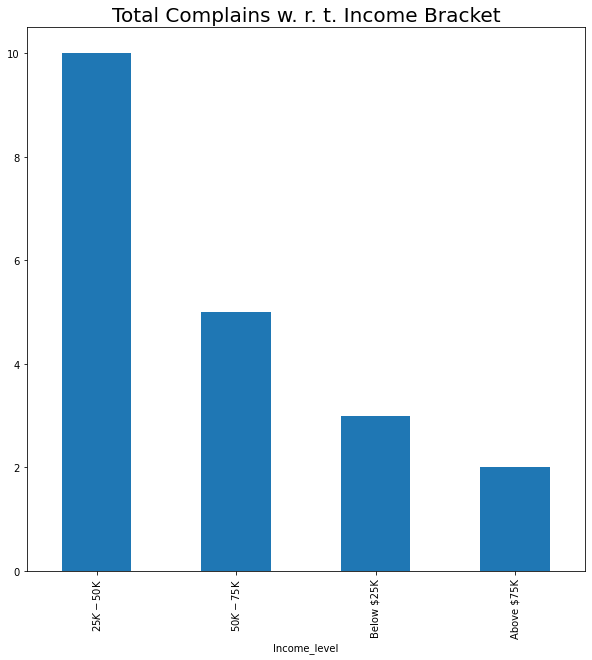

In [ ]:
df.groupby('Income_level')['Complain'].sum().sort_values(ascending=False).plot(kind="bar", figsize=(10, 10))
plt.title('Total Complains w. r. t. Income Bracket', size=20)

## Average Order Value




###1.   Quarterly

Text(0.5, 1.0, 'Average Order Value w. r. t. Quarters')

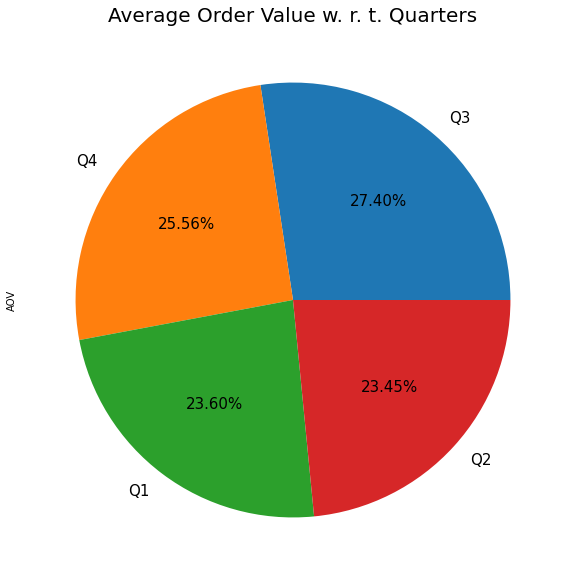

In [ ]:
df.groupby('Quarter')['AOV'].mean().sort_values(ascending=False).plot(kind="pie" , autopct='%1.2f%%', fontsize=15, figsize=(10,10))
plt.title('Average Order Value w. r. t. Quarters', size=20)

The third quarter (Q3) has the highest Average Order Value followed by fourth quarter (Q4)

###2.   Monthly

Text(0.5, 1.0, 'Average Order Value w. r. t. Months')

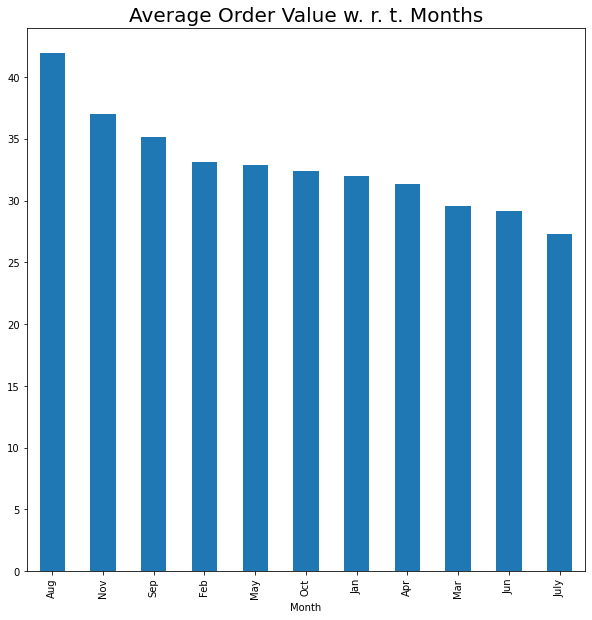

In [ ]:
df.groupby('Month')['AOV'].mean().sort_values(ascending=False).plot(kind="bar",  figsize=(10, 10))
plt.title('Average Order Value w. r. t. Months', size=20)

August has the highest Average Order Value followed by November and September.

## Analysis w. r. t. Dependents

### Family Distribution w. r. t. Dependents

In [ ]:
a= df.Dependents.value_counts()
a

1    1126
0     637
2     421
3      53
Name: Dependents, dtype: int64

Text(0.5, 1.0, 'Family Distribution w. r. t. Dependents')

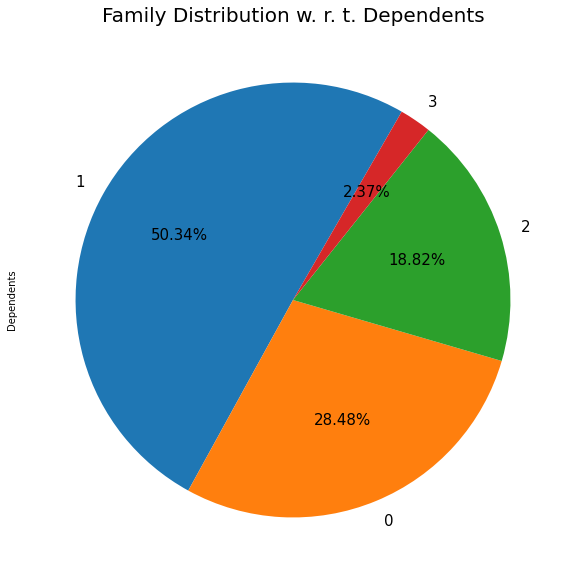

In [ ]:
#df.Dependents.value_counts().plot(kind="pie", autopct='%1.2f%%',figsize= (8,8),  startangle=60)

a.plot(kind="pie", autopct='%1.2f%%', fontsize=15, figsize=(10,10), startangle=60)
plt.title('Family Distribution w. r. t. Dependents', size=20)

In [ ]:
ed=(1, 0, 2, 3)

fig = px.pie(a,names=ed,values='Dependents', title="Family Distribution w. r. t. Dependents",  color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20 )

fig.show()

Families with 1 dependent account for the greatest chunk in Family Distribuion.

### Total Income w. r. t. Family Size

In [ ]:
dep_inc=df.groupby('Dependents')['Income'].sum().sort_values(ascending=False)
dep_inc

Dependents
1    53764089.5
0    41764998.5
2    18815628.5
3     2487994.5
Name: Income, dtype: float64

Text(0.5, 1.0, 'Total Income w. r. t. Family Size')

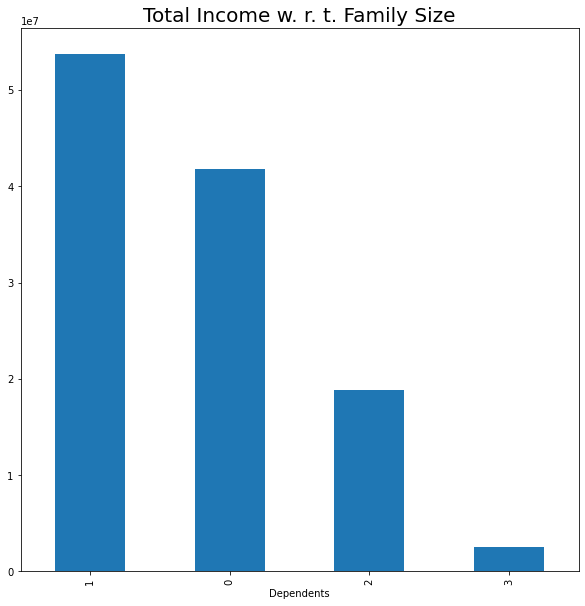

In [ ]:
df.groupby('Dependents')['Income'].sum().sort_values(ascending=False).plot(kind="bar",  figsize=(10, 10))
plt.title('Total Income w. r. t. Family Size', size=20)

Families with 1 dependent have the highest total income followed by families with no dependents and 2 dependents. 

### Total Sales w. r. t. Family Size

In [ ]:
b=df.groupby('Dependents')['Total_Sales'].sum().sort_values(ascending=False)
b

Dependents
0    703794
1    533156
2    103544
3     14554
Name: Total_Sales, dtype: int64

Text(0.5, 1.0, 'Total Sales w. r. t. Family Size')

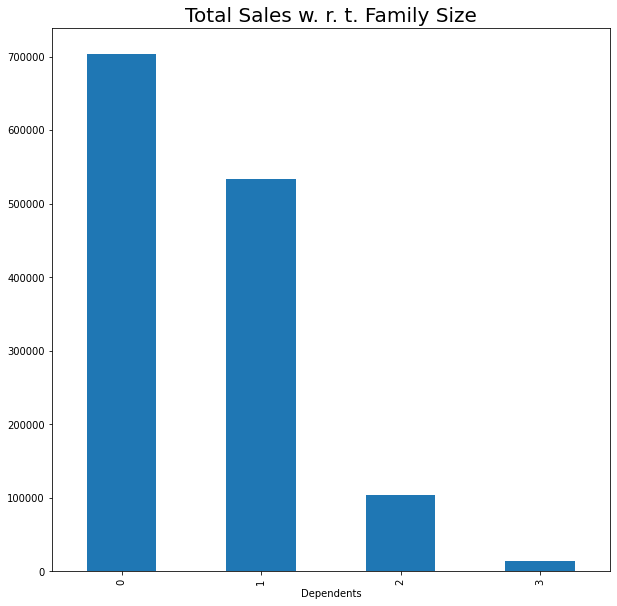

In [ ]:
df.groupby('Dependents')['Total_Sales'].sum().sort_values(ascending=False).plot(kind="bar", figsize=(10, 10))
plt.title('Total Sales w. r. t. Family Size', size=20)

In [ ]:
import plotly.express as px

ed=(0, 1, 2, 3)

fig = px.pie(b,names=ed,values='Total_Sales', title="Total Sales w. r. t. Family Size",  color_discrete_sequence=px.colors.sequential.Aggrnyl)

fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20 )

fig.show()

Country with most accepted in last campaign

Q11)The Chief Marketing specialist wants to visually see which Country has the most number of customers who accepted the last campaign. What is your approach?



## Analysis of Age of Customers and Age Bracket of Customers

The Marketing Manager wants to know the 'Age' of the customers as well as their Age Brackets. Extract the feature age from the given dataset and display the statistical summary of the age?

### Distribution on the basis Age of Customers

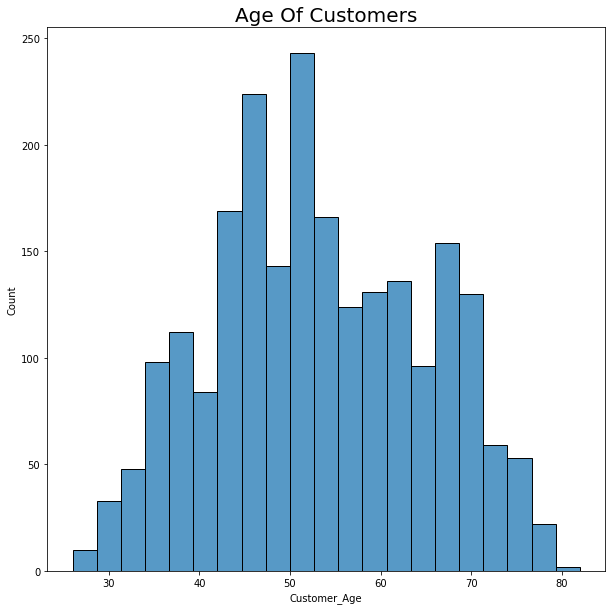

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Age Of Customers', size=20)
sb.histplot(x=df['Customer_Age'])

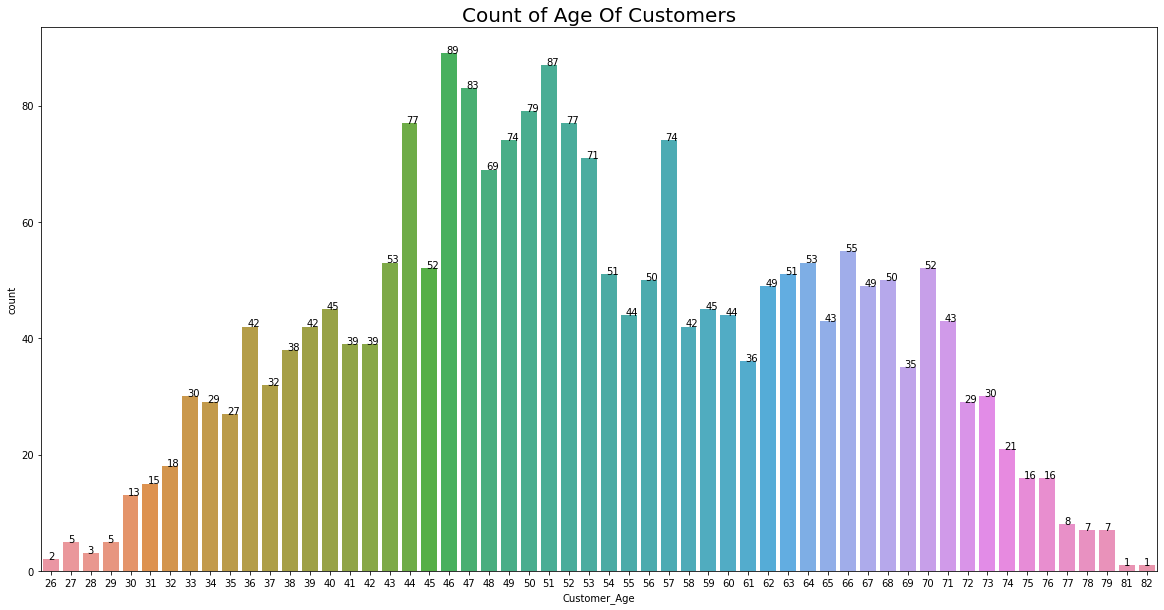

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Count of Age Of Customers', size=20)
ax = sb.countplot(x=df['Customer_Age'])
for p in ax.patches: 
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

### Distribution on the basis Age Bracket of Customers

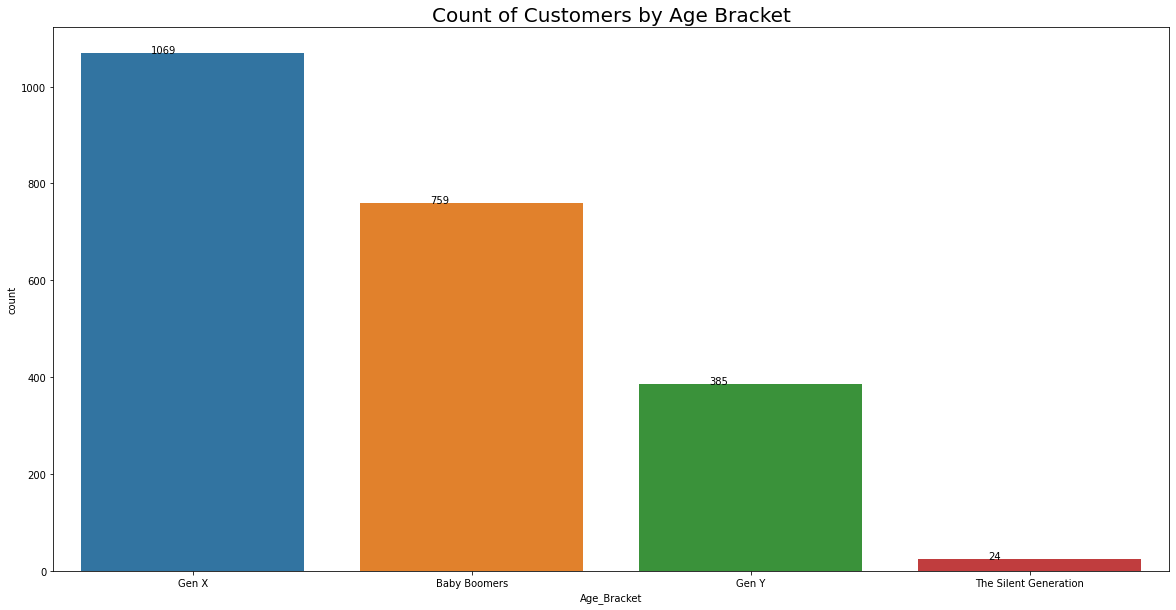

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Count of Customers by Age Bracket', fontsize=20)
ax = sb.countplot(x=df['Age_Bracket'])
for p in ax.patches: 
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

Gen X make up the highest percentage of customers followed by baby boomers and Gen Y

### Income by Age Bracket

In [ ]:
df.groupby('Age_Bracket')['Income'].sum().sort_values(ascending=False)

Age_Bracket
Gen X                    54071256.0
Baby Boomers             43213110.0
Gen Y                    17950507.5
The Silent Generation     1597837.5
Name: Income, dtype: float64

Text(0.5, 1.0, 'Income w. r. t. Age Bracket')

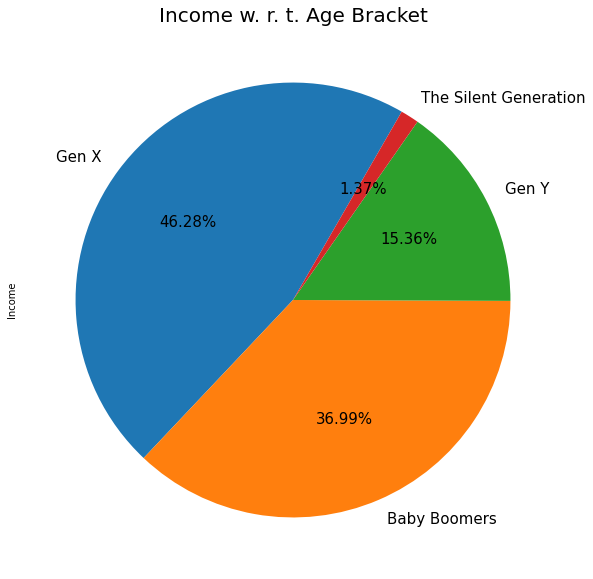

In [ ]:
plt.figure(figsize=(10,10))
df.groupby('Age_Bracket')['Income'].sum().sort_values(ascending=False).plot(kind="pie", autopct='%1.2f%%',  fontsize=15, startangle=60)
plt.title("Income w. r. t. Age Bracket", size=20)

### Total Sales w. r. t. Age Bracket

In [ ]:
df.groupby('Age_Bracket')['Total_Sales'].sum()

Age_Bracket
Baby Boomers             530428
Gen X                    576130
Gen Y                    222666
The Silent Generation     25824
Name: Total_Sales, dtype: int64

Text(0.5, 1.0, 'Total Sales w. r. t. Age Bracket')

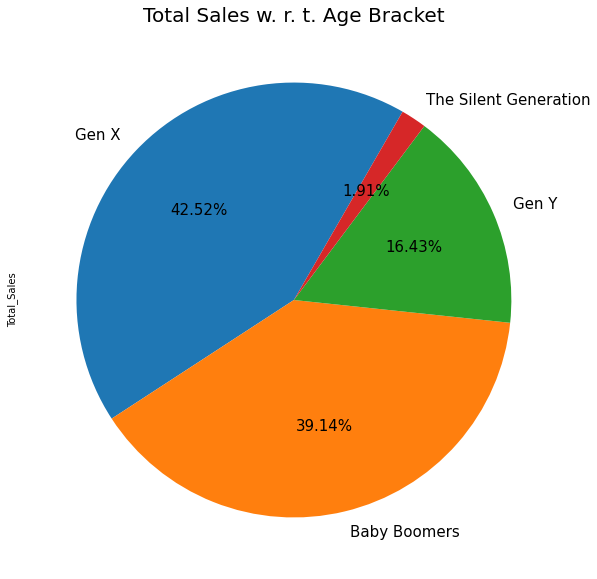

In [ ]:
plt.figure(figsize=(10,10))
df.groupby('Age_Bracket')['Total_Sales'].sum().sort_values(ascending=False).plot(kind="pie", autopct='%1.2f%%',  fontsize=15, startangle=60)
plt.title("Total Sales w. r. t. Age Bracket", size=20)

### Purchase w. r. t. Age Bracket

In [ ]:
df.groupby('Age_Bracket')['Total_Purchase'].sum()

Age_Bracket
Baby Boomers             12485
Gen X                    15339
Gen Y                     4961
The Silent Generation      481
Name: Total_Purchase, dtype: int64

Text(0.5, 1.0, 'Total Purchase w. r. t. Age Bracket')

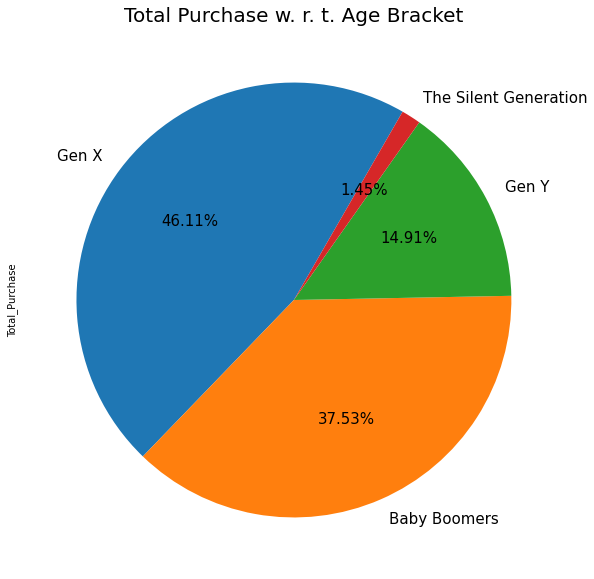

In [ ]:
plt.figure(figsize=(10,10))
df.groupby('Age_Bracket')['Total_Purchase'].sum().sort_values(ascending=False).plot(kind="pie", autopct='%1.2f%%',  fontsize=15, startangle=60)
plt.title("Total Purchase w. r. t. Age Bracket", size=20)

## Correlation between various features

Text(0.5, 1.0, 'Correlation among all the columns of the dataframe')

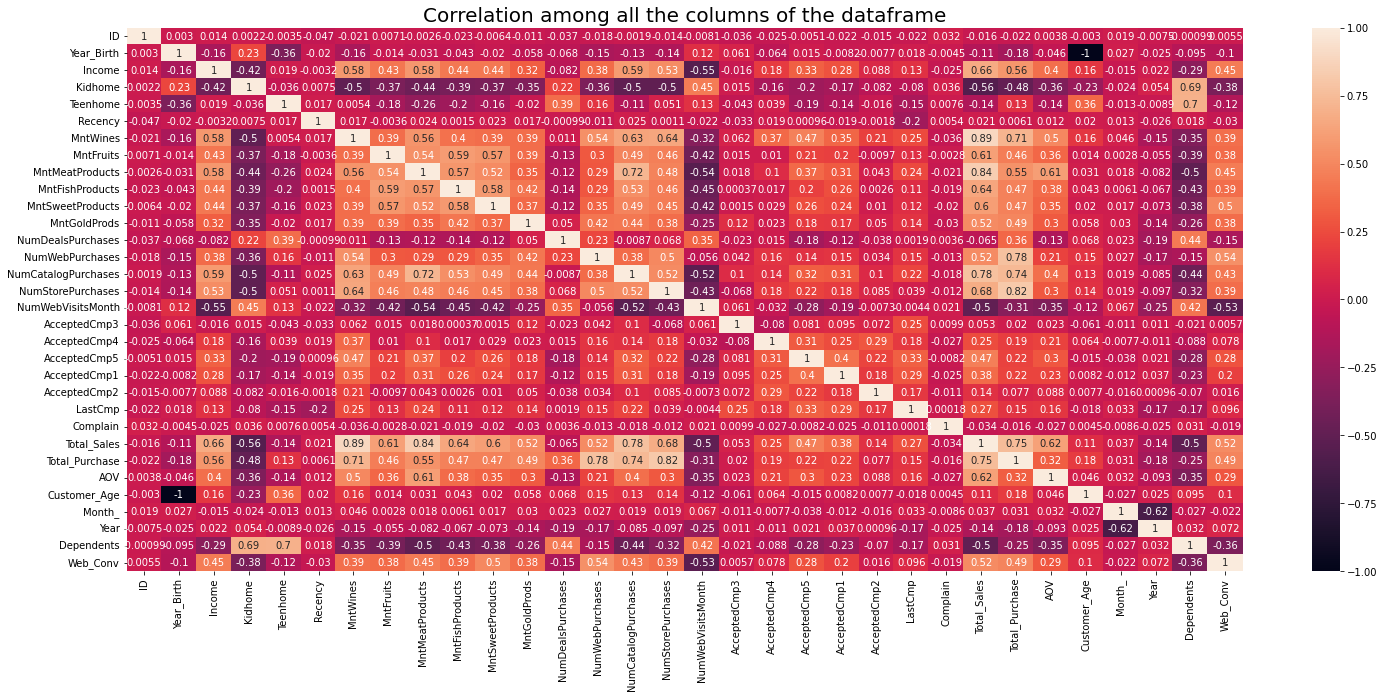

In [ ]:
plt.figure(figsize=(25,10))
sb.heatmap(df.corr(),annot=True)

plt.title("Correlation among all the columns of the dataframe", fontsize=20)


From this heatmap we can observe the following clusters of correlated features:

A. The "Income" cluster: </br>

1. The total amount spent ('Total_Sales' other and sales features containing the term 'Mnt') and total number of purchases ('Total_Purchases' and other features containing the term 'Num...Purchases' features) are positively correlated with 'Income' </br>
2. Purchasing in store, on the web, or via the catalog ('NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases') is positively correlated with 'Income'</br></br>

B. The "Dependency" cluster:</br>
1. The total amount spent ('Total_Sales' and other features containing the term 'Mnt') and number of purchases ('Total_Purchases' and other features containing the term 'Num...Purchases') are negatively correlated with 'Dependents' features.</br>
2. The number of deal purchases ('NumDealsPurchases') is positively correlated with 'Dependents'feature (kids and/or teens) and negatively correlated with 'Income'</br></br>

C. The "Advertising Campaigns" cluster:</br>
1. Acceptance of the advertising campaigns (the features containing 'AcceptedCmp' term) is strongly positively correlated with each other</br>
Weak positive correlation of the advertising campaigns is seen with the "High Income" cluster, and weak negative correlation is seen with the "Have Kids & Teens" cluster</br>
Anomalies:</br>
Surprisingly, the number of website visits in the last month ('NumWebVisitsMonth') does not correlate with an increased number of web purchases ('NumWebPurchases')</br>
Instead, 'NumWebVisitsMonth' is positively correlated with the number of deals purchased ('NumDealsPurchases'), suggesting that suggesting that deals are an effective way of stimulating purchases on the website

Income has a high positive correlation with "NumPurchases" columns and "Mnt" columns. This represents the High Income cluster and shows people with high income spend more and purchase more frequently. Income has a high negative correlation with "NumWebVisitsMonth" suggesting that customers with high income do not for web visits too often.</br></br>

"Amount Spent on Wines" has a high positive correlation with "NumCatalogPurchases" and "NumStorePurchases", and similarly, "Amount Spent on Meat products" has a very high positive correlation with "NumCatalogPurchases", suggesting that People generally buy Wines and Meat products through Catalogs.
</br></br>
"NumWebVisitsMonth" shows no correlation with "NumWebPurchases". Instead, it shows a mild correlation with "NumDealsPurchases" which suggests that deals are an effective way of stimulating purchases on the website.</br>

In [ ]:
#from google.colab import files
#files.download("marketing_data.csv")
